In [1]:
import pandas as pd
import seaborn as sbn
import geopandas as geo_pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
! ls /data

'California Census Block Centroids.txt'   incident_distances.zip
 city_facilities.csv			  incident_nearest_distances.zip
 CSE6242				  List_of_Streets_and_Intersections.csv
 CSE6242.zip				  Rush_Hour_Routes.csv
 fire_incidents.csv			 'SF Find Neighborhoods.geojson'
 fire_incidents.zip			  Speed_Limits_per_Street_Segment.csv
 fire_prev_districts.zip		  stclines_highways.csv
 group_1_data.csv			  Streets___Active_and_Retired.csv


## Load Fire Incidents

In [6]:
all_incidents = geo_pd.read_file("/data/fire_incidents.csv")
all_incidents['point'] = geo_pd.GeoSeries.from_wkt(all_incidents['point'], crs="EPSG:4326")
all_incidents = geo_pd.GeoDataFrame(all_incidents, geometry="point")
all_incidents.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 566251 entries, 0 to 566250
Data columns (total 65 columns):
 #   Column                                        Non-Null Count   Dtype   
---  ------                                        --------------   -----   
 0   Incident Number                               566251 non-null  object  
 1   Exposure Number                               566251 non-null  object  
 2   ID                                            566251 non-null  object  
 3   Address                                       566251 non-null  object  
 4   Incident Date                                 566251 non-null  object  
 5   Call Number                                   566251 non-null  object  
 6   Alarm DtTm                                    566251 non-null  object  
 7   Arrival DtTm                                  566251 non-null  object  
 8   Close DtTm                                    566251 non-null  object  
 9   City                         

In [7]:
all_incidents.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

## Load Neighborhoods

In [8]:
sf_neighborhoods = geo_pd.read_file('/data/SF Find Neighborhoods.geojson')
sf_neighborhoods.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 117 entries, 0 to 116
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   link      93 non-null     object  
 1   name      117 non-null    object  
 2   geometry  117 non-null    geometry
dtypes: geometry(1), object(2)
memory usage: 2.9+ KB


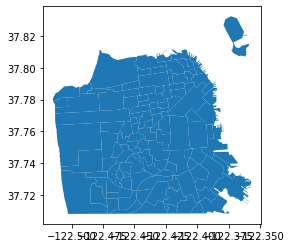

In [9]:
_ = sf_neighborhoods.geometry.plot()

## Load Nearest Distances

In [10]:
nearest_dist = pd.read_csv("/data/incident_nearest_distances.zip")
nearest_dist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 566251 entries, 0 to 566250
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Unnamed: 0       566251 non-null  int64  
 1   Incident Number  566251 non-null  object 
 2   ID               566251 non-null  int64  
 3   lon              566161 non-null  float64
 4   lat              566161 non-null  float64
 5   nearest_station  566161 non-null  float64
dtypes: float64(3), int64(2), object(1)
memory usage: 25.9+ MB


In [11]:
nearest_dist.head()

,Unnamed: 0,Incident Number,ID,lon,lat,nearest_station
0,0,"8,028,304",80283040,-122.418373,37.742090,0.006408
1,1,"8,028,303",80283030,-122.394890,37.756291,0.004497
2,2,"8,028,309",80283090,-122.407468,37.780080,0.003405
3,3,"8,028,314",80283140,-122.426849,37.776126,0.005763
4,4,"8,028,319",80283190,-122.486394,37.774285,0.004719


## Examine Sunset Neighborhood

In [12]:
sf_neighborhoods.name[sf_neighborhoods.name.str.lower().str.match('.*sunset.*')]

38     Outer Sunset
108    Inner Sunset
Name: name, dtype: object

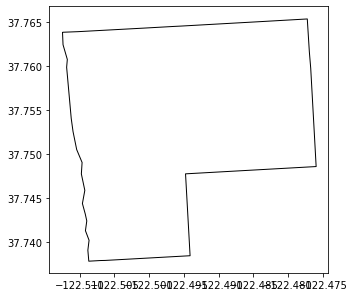

In [18]:
plt.rcParams["figure.figsize"]=5,5
outer_sunset = sf_neighborhoods.loc[sf_neighborhoods.name == "Outer Sunset"]
_ = outer_sunset.plot(color='white', edgecolor='black')

In [14]:
sunset_pts = geo_pd.overlay(all_incidents, outer_sunset, how='intersection')

In [15]:
sunset_pts.shape

(14643, 66)

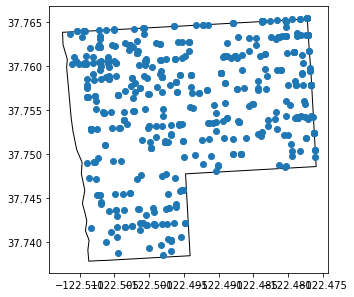

In [19]:
plt.rcParams["figure.figsize"]=5,5
base_plot = outer_sunset.plot(color='white', edgecolor='black')
_ = sunset_pts.sample(500).plot(ax=base_plot)